In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 21s 2us/step


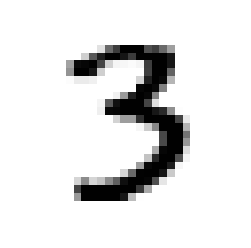

In [4]:
# 이미지 데이터를 plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

digit = x_train[10000]
plt.imshow(digit, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [5]:
# 그 이미지의 label
y_train[10000]

3

In [6]:
y_train_5 = (y_train == 5)  # 5는 True, 그 외는 False
y_test_5 = (y_test == 5)  # 5는 True, 그 외는 False

In [7]:
y_train_5[:5]

array([ True, False, False, False, False])

In [8]:
print(x_train.shape)
print(y_train_5.shape)

(60000, 28, 28)
(60000,)


In [9]:
# 확률적 경사 하강법 분류기를 사용하기 위해서는 input shape이 2 dim 이어야 한다.
import numpy as np

x_train_2d = np.reshape(x_train, (-1, 784))
x_test_2d = np.reshape(x_test, (-1, 784))

In [10]:
#hinge-loss function을 사용하는 sgdclassifier
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter=5, random_state=42)
# 훈련
sgd.fit(x_train_2d, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
# 결과 check
pred = sgd.predict([x_train_2d[10]])
print('Prediction: ', pred)
print('Actual: ', y_train_5[10])

Prediction:  [False]
Actual:  False
